Pandas함수 정리: https://gaga.tistory.com/150

folium 사용가이드: https://iridescent-zeal.tistory.com/184

In [174]:
# 코랩 폰트 깨짐 해결 ( plt.rc('font', family='NanumBarunGothic') )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [77]:
file = r'/content/drive/MyDrive/실습/subway_raw.csv'
subway_raw = pd.read_csv(file)

In [78]:
subway_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사용일자     107028 non-null  object 
 1   요일       107028 non-null  object 
 2   노선명      107028 non-null  object 
 3   역명       107028 non-null  object 
 4   승차총승객수   107028 non-null  float64
 5   하차총승객수   107028 non-null  float64
 6   승하차총승객수  107028 non-null  float64
 7   연월       107028 non-null  object 
 8   월일       107028 non-null  object 
 9   등록일자     107028 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.2+ MB


<h1>Q) 2019.01~06 중 언제 지하철을 가장 많이 이용했을까? (기준: 승하차승객수)</h1>

In [79]:
# 가설1) 1월~6월 중 5월에 지하철 승객수가 많다
group_month=subway_raw.groupby('연월')\
                    .agg({'승하차총승객수':['sum', 'mean']})
avg_of_sum=group_month['승하차총승객수']['sum'].mean()
group_month

승하차총승객수              
                 sum          mean
연월                                
2019-01  442746389.0  24148.924894
2019-02  379836010.0  22960.527716
2019-03  466692826.0  25443.944281
2019-04  470934348.0  26533.007381
2019-05  485718557.0  26489.886398
2019-06  442210635.0  24949.821429

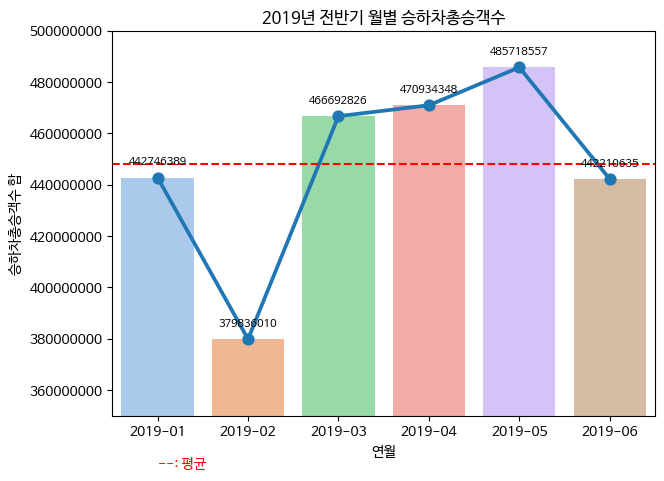

In [80]:
#bar 시각화
fig, ax = plt.subplots(figsize=(7, 5))

plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=group_month.index, y=group_month['승하차총승객수']['sum'].values, hue=group_month.index, palette = 'pastel')\
        .set( ylim=(350000000,500000000))
sns.pointplot(x=group_month.index, y=group_month['승하차총승객수']['sum'].values)
plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title("2019년 전반기 월별 승하차총승객수")
plt.xlabel('연월')
plt.ylabel('승하차총승객수 합')
plt.axhline(y = avg_of_sum, color = 'red', linestyle = '--')
plt.text(0, 330000000, '--: 평균', color='red')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+5000000, f"{p.get_height():.0f}", ha = 'center', fontsize=8)


In [81]:
# 가설2) 요일중에서 목요일에 지하철 승객수가 많다
group_day=subway_raw.groupby('요일').agg({'승하차총승객수':['sum','mean']})
group_day=group_day.reindex(['월','화','수','목','금','토','일'])
avg_of_sum_day=group_day['승하차총승객수']['sum'].mean()
group_day

승하차총승객수              
            sum          mean
요일                           
월   391555551.0  26474.344219
화   411979965.0  26784.992198
수   421134136.0  27397.966040
목   428684383.0  27869.222663
금   445310717.0  28959.531573
토   341950018.0  22249.334244
일   247523995.0  16116.941985

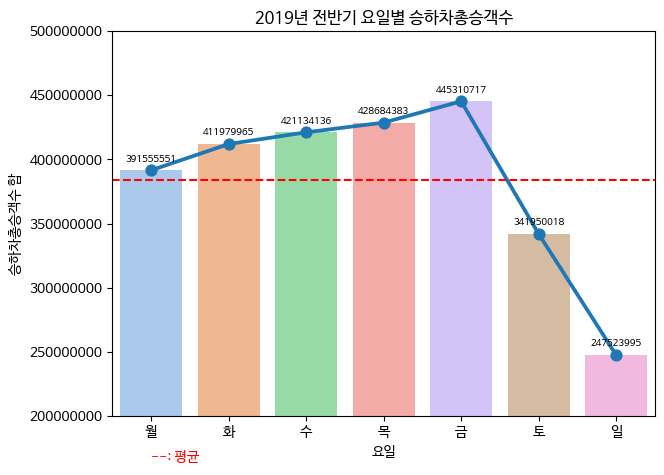

In [82]:
#bar 시각화
fig, ax = plt.subplots(figsize=(7, 5))

plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=group_day.index, y=group_day['승하차총승객수']['sum'].values, hue=group_day.index, palette = 'pastel')\
        .set( ylim=(200000000,500000000))
sns.pointplot(x=group_day.index, y=group_day['승하차총승객수']['sum'].values)
plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title("2019년 전반기 요일별 승하차총승객수")
plt.xlabel('요일')
plt.ylabel('승하차총승객수 합')
plt.axhline(y = avg_of_sum_day, color = 'red', linestyle = '--')
plt.text(0, 165000000, '--: 평균', color='red')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+7000000, f"{p.get_height():.0f}", ha = 'center', fontsize=7)

<h1>Q) 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요? (pointplot))</h1>

In [83]:
df_per_day = subway_raw.groupby("사용일자")['승하차총승객수'].agg('sum')
df_per_day = df_per_day.reset_index()
df_per_day.head(5)

,사용일자,승하차총승객수
0,2019-01-01,6813453.0
1,2019-01-02,15214002.0
2,2019-01-03,15716213.0
3,2019-01-04,16509281.0
4,2019-01-05,12092335.0


In [84]:
df_per_day['사용일자']=pd.to_datetime(df_per_day['사용일자'])
df_per_day['일'] = df_per_day['사용일자'].dt.strftime("%d")

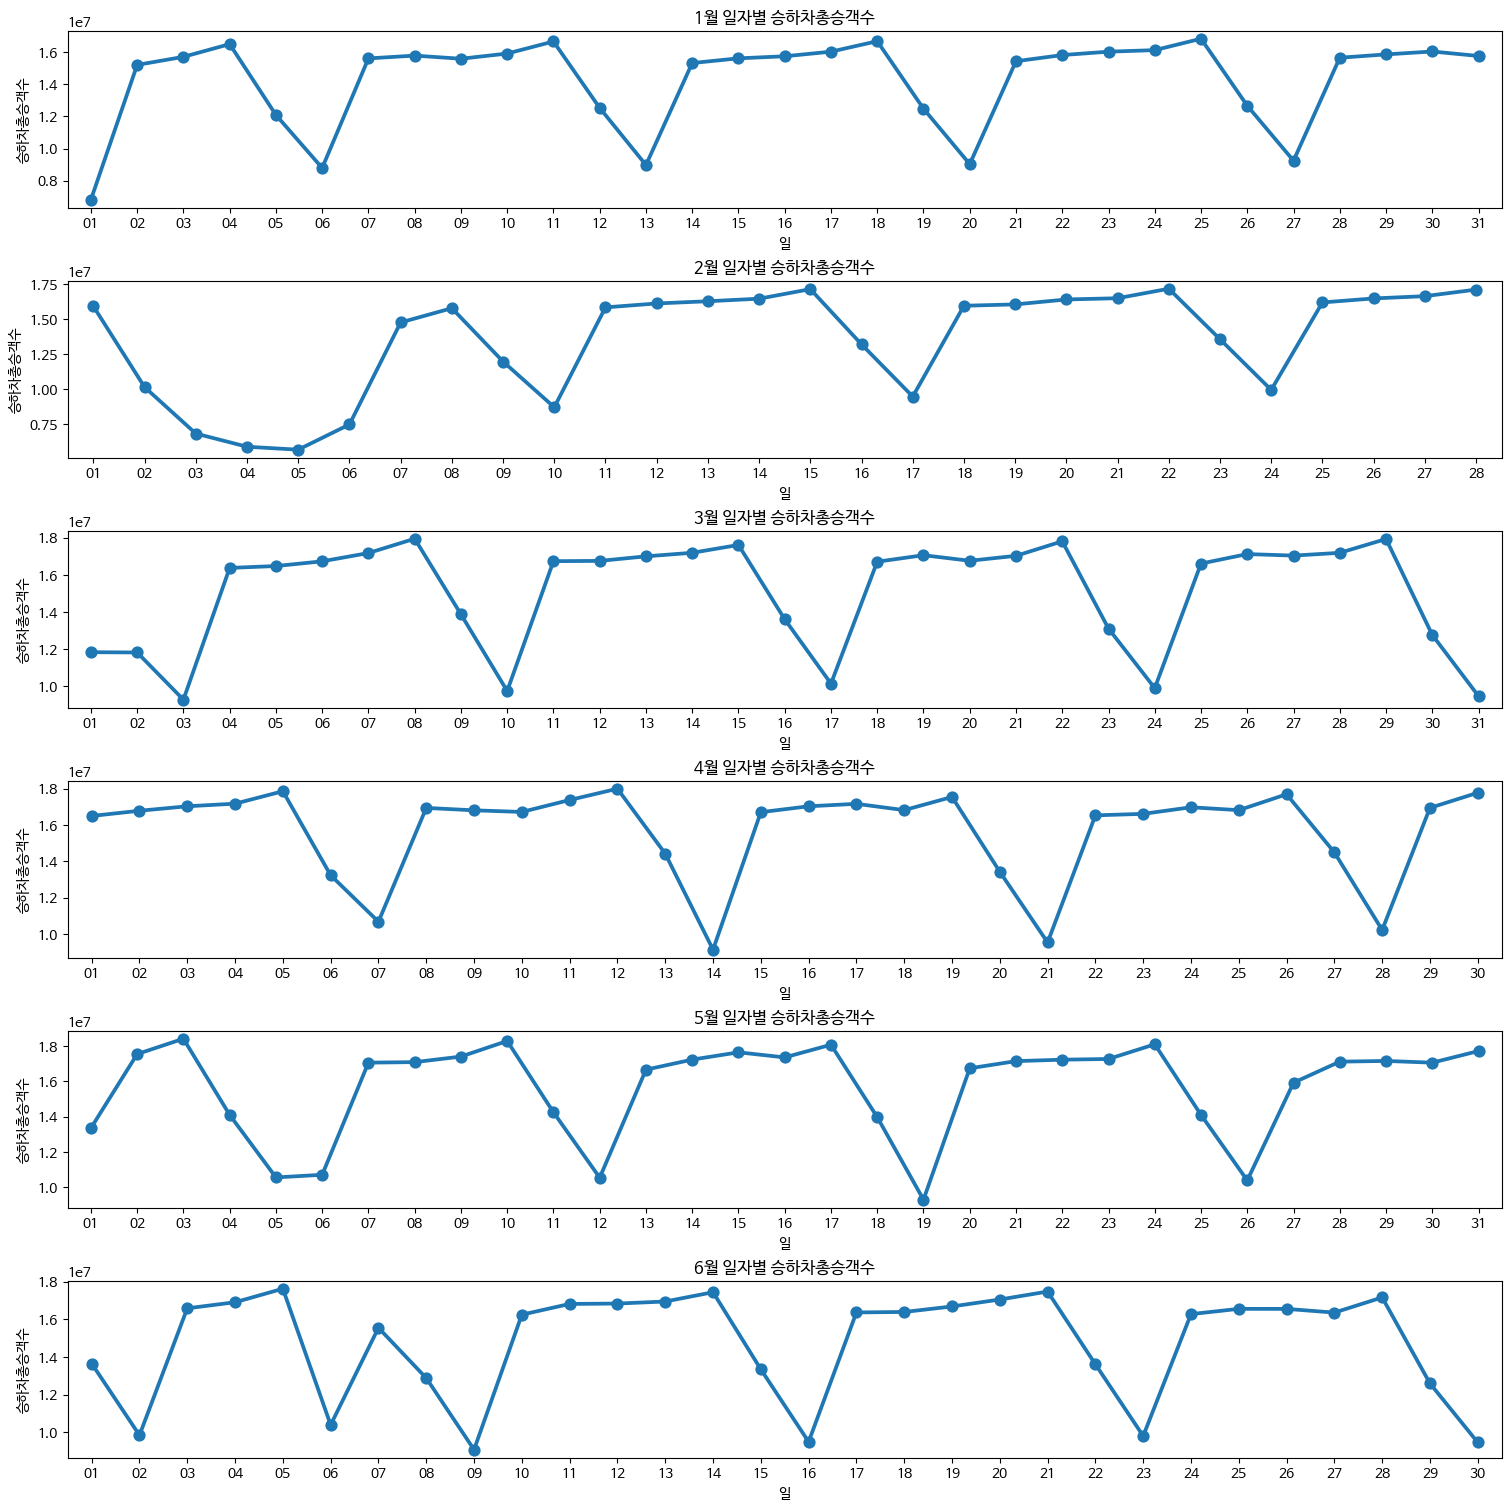

In [85]:
# fig( figure ): 그래프를 그릴 수 있는 캔버스 역할을 함
# axes: 3*2 배열
fig, axes = plt.subplots(constrained_layout=True, nrows=6, ncols=1, figsize=(15, 15))

dayLst = [31, 28, 31, 30, 31, 30]
hap = 0

# enumerate: 인덱스와 값을 동시에 불러옴
for idx, day in enumerate(dayLst):
    row = idx
    col = 0

    month = idx+1

    sns.pointplot(x="일", y="승하차총승객수", data=df_per_day[hap:hap+day], ax=axes[row])
    axes[row].set_title(f"{month}월 일자별 승하차총승객수")

    hap += day


<h1>Q) 가장 승객이 많이 타는 승차역은?</h1>

In [86]:
group_station=subway_raw.groupby('역명')['승차총승객수'].agg(['sum'])\
              .sort_values('sum', ascending=False)

# 상위 20개 역만 확인
group_station=group_station.head(10)
group_station.head(5)

,sum
역명,
잠실,18574323.0
강남,18148024.0
고속터미널,17541287.0
홍대입구,17270084.0
서울역,17165598.0


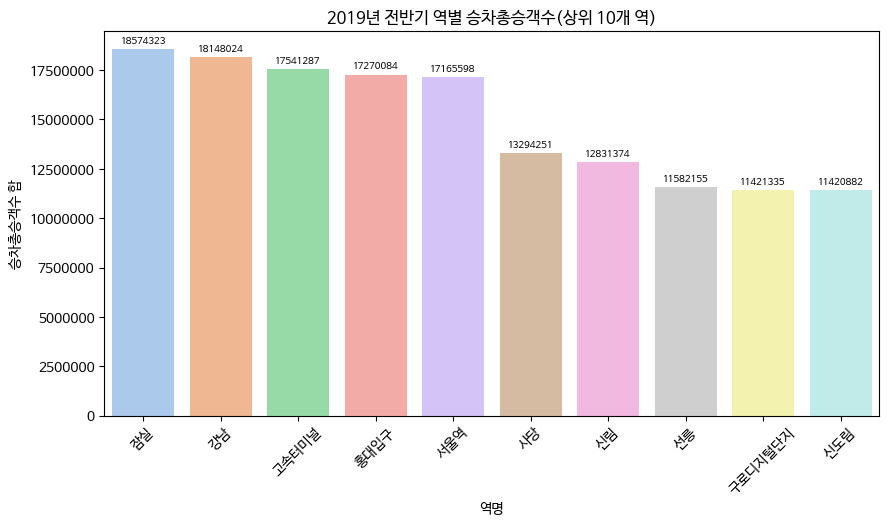

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=group_station.index, y=group_station['sum'].values, hue=group_station.index, palette='pastel')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('역명')
plt.ylabel('승차총승객수 합')
plt.title('2019년 전반기 역별 승차총승객수(상위 10개 역)')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+300000, f"{p.get_height():.0f}", ha = 'center', fontsize=7)
plt.show()

<h1>Q) 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선,역별/요일별 heatmap)</h1>

Text(0.5, 1.0, '노선별/요일별 승차총승객수 합')

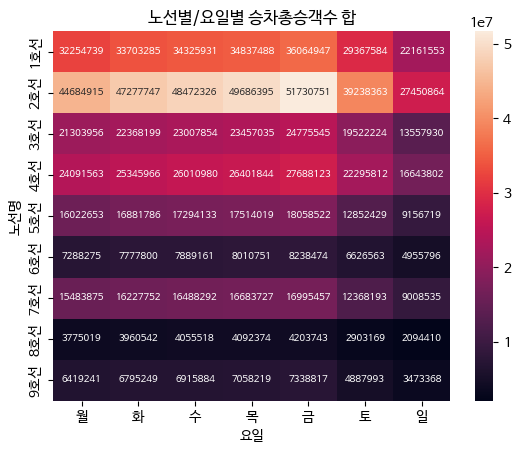

In [88]:
# heatmap을 나타내려면 데이터프레임을 피벗테이블 형태로 바꿔줘야 함
# 1~9호선만 취급
dfHeat = subway_raw.pivot_table(index="노선명", columns="요일", values="승차총승객수", aggfunc = 'sum')[:9]
dfHeat = dfHeat.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])

sns.heatmap(dfHeat, annot=True, fmt='.0f', annot_kws={"fontsize": 7})
plt.title("노선별/요일별 승차총승객수 합")

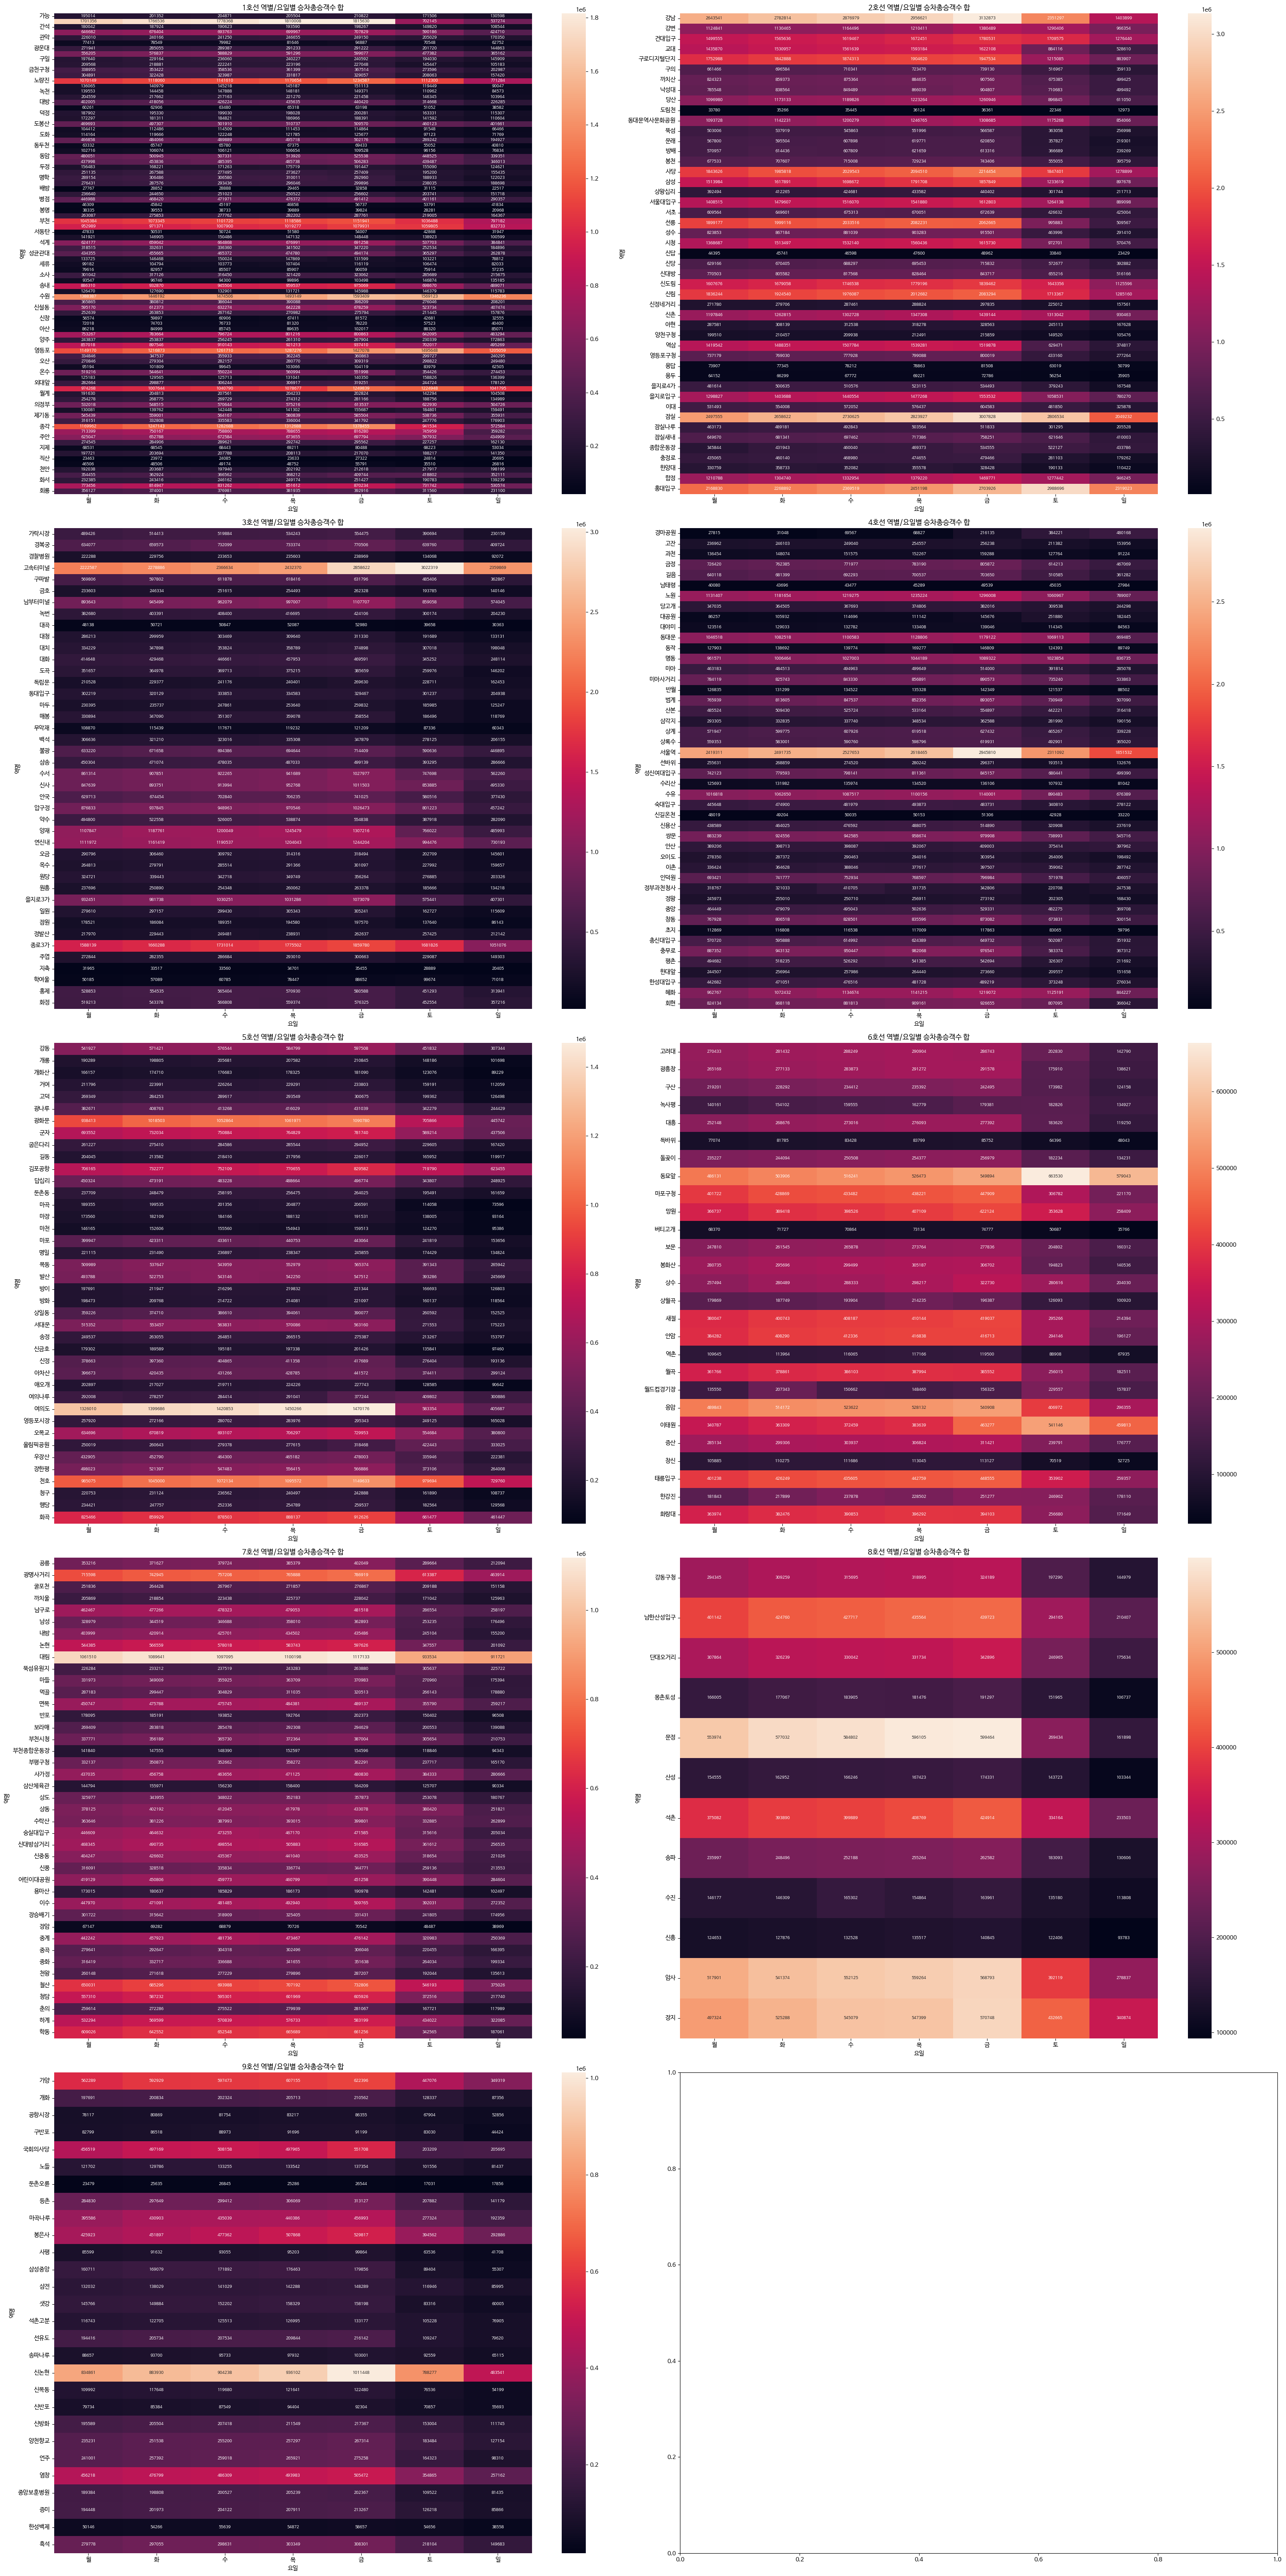

In [89]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 60))

for route in range(1, 10):
    row = (route-1) // 2
    col = (route-1) % 2

    dfPivot = subway_raw[subway_raw["노선명"] == f"{route}호선"].pivot_table(index="역명", columns="요일", values="승차총승객수", aggfunc = 'sum')

    dfPivot = dfPivot.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])

    sns.heatmap(dfPivot, annot=True, fmt='.0f', ax=axes[row][col], annot_kws={"fontsize": 7})
    axes[row][col].set_title(f"{route}호선 역별/요일별 승차총승객수 합")

plt.tight_layout()

<h1>Q) 1호선에서 가장 하차를 많이하는 역은? (groupby)</h1>

In [90]:
group_station_1=subway_raw.query('노선명=="1호선"')\
                            .groupby('역명')['하차총승객수'].agg(['sum'])\
                            .sort_values('sum', ascending=False)
# 상위 20개 역만 확인
group_station_1=group_station_1.head(10)
group_station_1.head(5)

,sum
역명,
가산디지털단지,10571381.0
수원,10226609.0
영등포,9432067.0
용산,7817685.0
노량진,7603258.0


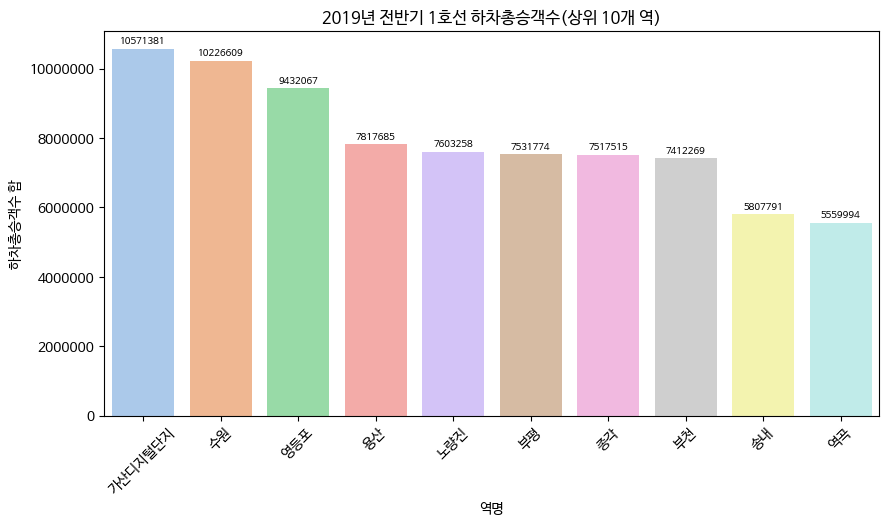

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=group_station_1.index, y=group_station_1['sum'].values, hue=group_station_1.index, palette='pastel')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('역명')
plt.ylabel('하차총승객수 합')
plt.title('2019년 전반기 1호선 하차총승객수(상위 10개 역)')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+150000, f"{p.get_height():.0f}", ha = 'center', fontsize=7)
plt.show()

<h1>Q) 2호선 중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium역 표시)</h1>

In [92]:
file1 = r'/content/drive/MyDrive/실습/지하철노선위경도정보2.csv'
subway_geo_raw = pd.read_csv(file1)

In [93]:
subway_geo_2=subway_geo_raw.query('호선=="2호선" and 역지역=="수도권"')\
                            .reset_index(drop=True)
subway_geo_2.rename(columns={'역이름':'역명'}, inplace=True)
subway_geo_2.head(3)

,역명,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,서울대입구,수도권,37.481285,126.952695,2호선
2,강변,수도권,37.535118,127.094723,2호선


In [94]:
group_station_2=subway_raw.query('노선명=="2호선"')\
                            .groupby('역명',as_index = False)\
                            .agg(역별_승차총승객수=('승차총승객수', 'sum'))\
                            .reset_index(drop=True)
group_station_2.head(3)

,역명,역별_승차총승객수
0,강남,18148024.0
1,강변,8267462.0
2,건대입구,11123655.0


In [95]:
merge_outer=pd.merge(subway_geo_2, group_station_2, how='outer', on='역명')\
                  .sort_values('역별_승차총승객수', ascending=False)
max_station=merge_outer.head(1)
max_station

,역명,역지역,위도,경도,호선,역별_승차총승객수
41,잠실,수도권,37.513309,127.100215,2호선,18574323.0


In [96]:
myMap = folium.Map(location=[max_station['위도'], max_station['경도']], zoom_start=12)

folium.Marker([max_station['위도'], max_station['경도']],
  popup="max_station['역명']",
  tooltip="max_station['역명']",
  icon=folium.Icon(color='red', icon='star')).add_to(myMap)

myMap
## myMap.save('/content/drive/MyDrive/실습/max_from_line2.html')